# Métodos Numéricos Aplicados a la Ingeniería

(Nieves, A., & Domingu, F. (2014). Métodos Numéricos Aplicados a la Ingeniería.)

<a id='another_cell'></a>

## Capítulo 2.- Solución de ecuaciones no lineales



### Introducción

Uno de los problemas que se precenta con frecuencia en ingeniería es econtrar las raíces de las ecuaciones de la forma $f(x) = 0$, donde $f(x)$ es una función real de una variable $x$, como un polinomio en $x$

$$\large f(x) = 4x^{4}+x^{3}-9x+2$$

o una función trascendente*

$$ \large f(x)=e^{x}sen(x)+ ln(3x)+x^{3} $$

*(Las funciones trascentes contiene términos trigonómetrícos, exponenciales o logartímicas o ambos de la variable independiente.)*

Existen distintos algoritmos para encontrar las raíces o ceros de $ f(x)=0$, pero ninguno es general; es decir, no hya un algoritmo que funcione con todas las ecuaciones; por ejemplo, se puede tener un algortimo wue funciona perfectamente para encontrar las raíces de $f_{1}(x)=0$, pero al aplicarlo no se pueden ecnontrar los ceros de una ecuación distinta $f_{2}(x)=0$.

Solo en muy pocos casos será posible obtener las raíces exactactas de $f(x)=0$, como cuando $f(x)$ es un polinomio factotizable , tal como

$$ \large f(x) = (x-\bar x_{1}) (x-\bar x_{2})...(x-\bar x_{n}) $$

donde $\bar x_{i}$, $1 \leq i \leq n $ denota la *i*-ésima raíz de $f(x)=0$. Sin embargo, se pueden obtener soluciones aproximadas al utilizar alginos de los métodos numéricos de este capítulo. Se empezará con el método de *punto fijo* (también conocido como de aprozimaciones sucesivas, de iteración funcional, etc.), por ser el prototipo de todos ellos.

#### Método de punto fijo


Sea el incio de la ecuación general 

$
\begin{align}
\large f(x) &=0 \label{eq1}
\end{align}
$


de la cual se desea una encontrar una raíz real<sup>1</sup> $\bar x$.

El **primer paso** consisite en en transformar algebraicamente la ecuación a la forma equivalente.

$
\begin{align}
\large x = g(x) \label{eq2}
\end{align}
$

Por ejemplo para la ecuación 

$
\begin{align}
\large f(x) = 2x^{2} - x - 5 = 0 \label{eq3}
\end{align}
$

cuyas ***raíces*** son $1.850781059$ y $-1.350781059$, algunas posibilidades de $x = g(x)$ son:


$
\begin{align}
a)\;\;\;\;x &= 2x^{2} - 5 \label{4}\\
b)\;\;\;\;x &= \sqrt\frac{x+5}{2}\label{5}\\
c)\;\;\;\;x &= \frac {5}{2x-1}\label{6} \\
d)\;\;\;\;x &= 2x^{2} - 5\label{7} \\
e)\;\;\;\;x &= x -\frac {2x^{2}-x-5}{4x - 1}\label{8}\\
\end{align}
$


Una vez que se ha determinado una forma equivalente, el siguiente paso es ***tantear*** una raíz; esto puede hacerse por observación directa de la ecuación, por ejemplo en la ecuación ecuación $\eqref{6}$ se ve directamente que $x = 2$ es un valor cercano a una raíz.

Se denota el valor de tanteo o valor de inicio como $x_{0}$. Otros métodos de tanteo se estudiaran en la sección 2.8

Una vez que se tiene $x_{0}$ se ecalua $g(x)$ en $x_{0}$, denotándose el resultado de esta evaluación como $x_{1}$; esto es

$$
\large g(x_{0})=x_{1}
$$


El valor de $x_{1}$ comprado con $x_{0}$ presenta los siguientes dos casos

**1. Caso Que $x_{1}=x_{0}$**<br>
Esto indica que se ha elegido como valor inicial una raíz y el problema queda concluido. Para aclrarlo, recuérdese que si $\bar x$ es raíz de la ecuación $\eqref{eq1}$, se cumple que 

$$
\large f(\bar{x})= 0
$$


**2. Caso Que $x_{1}\neq x_{0}$**<br>
Es el caso más frecuente, e indica que $x_{1}$ y $x_{0}$ son distintos de $\bar x$



<a id='ejemplo-2.1'></a>
##### Ejemplo 2.1

Encuentra una aproximación a una raíz real de la ecuación

$$
\large cos\;x -3x = 0
$$

Dos posibilidades de $x$ son:
<div align="center">    
<a id='inciso-a'></a>
    <font size="3"> a) </font> $ \large x = cos \;x -2x$ = g(x)
</div>
<br>

<div align="center"> 
<a id='inciso-b'></a>
<font size="3">b) </font> $\large x = \frac{cos\;x}{3}$
</div>    



___
<sup>1</sup> Se puede discutir sobre raíces complejas en las seccion 2.9 y 2.10



Podemos ver la programación en la siguiente [sección](#programa-python).

<a id='programa-python'></a>
## Programemos esto en PYTHON

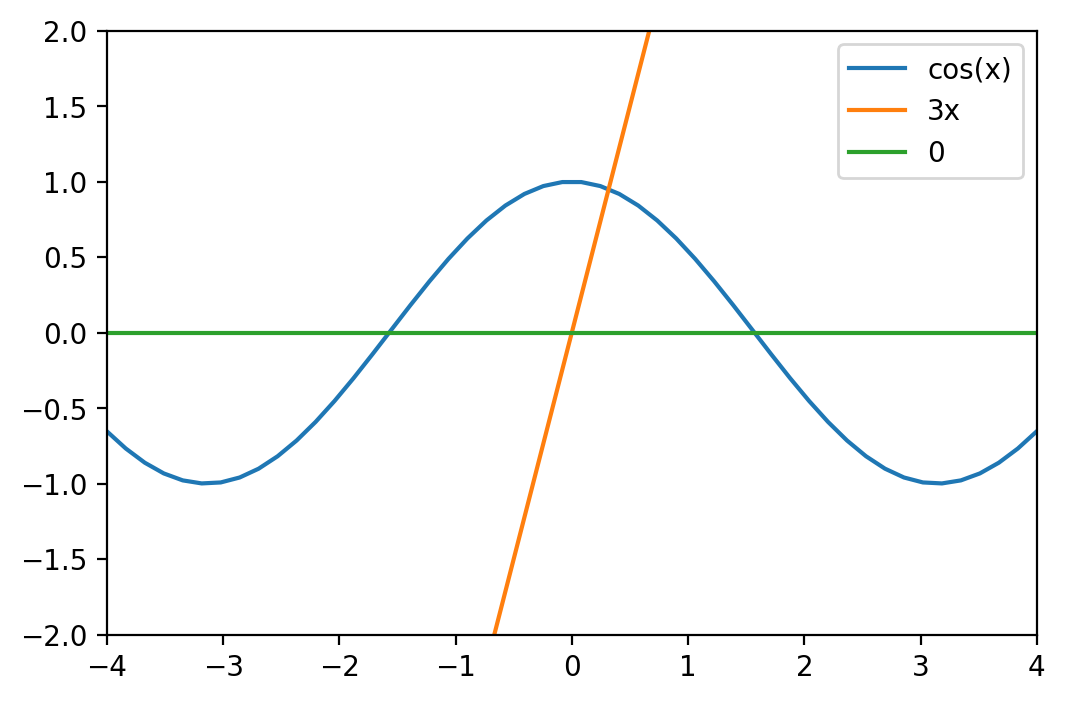

In [15]:
import numpy as np # sirve para hacer arreglos y operaciones entre arreglos
import matplotlib.pyplot as plt # nos sirve para grafica
import scipy.stats as stats #sirve para estadistica
import math # sirve para hacer funciones matematicas, como seno, coseno, potencias, etc.

# Ejemplo 2.1
x = np.linspace(-4,4,50)
y = np.cos(x)
z = 3*x
t = np.zeros(len(x)) # len(): es una función que saca el tamaño de un arreglo viende de 'length'
plt.rcParams['figure.dpi'] = 200 # cambiar tamaño del gráfico
plt.plot(x, y)
plt.plot(x,z)
plt.plot(x,t)
plt.legend(["cos(x)","3x","0"])
x_min = -4
x_max = 4
y_min = -2
y_max = 2
plt.axis([x_min, x_max, y_min, y_max])
plt.show()

De esta última figura podemos observar que un valor cerca de $\bar{x}$ es $x_{0}=(\pi/2)/4$. Iterando se obtiene para la forma del inciso [a](#inciso-a)

In [16]:
iteraciones = 5
i = np.arange(0,iteraciones+1)
x_i = np.zeros(len(i))
g_x_i = np.zeros(len(i))
abs_f_x_i = np.zeros(len(i))
x_i[0]= (np.pi) / 8 # Valor inicial
n = 0 # variable auxiliar

for n in range(len(i)-1): # voy a iterar de 0 hasta el número 5
    # en el primer ciclo n = 1
    g_x_i[n] = np.cos(x_i[n]) - (2*x_i[n])
    x_i[n+1] = g_x_i[n]
    abs_f_x_i[n] = abs(np.cos(x_i[n])- (3*x_i[n]))
    # aqui termina el for y se repite

print ("x_i",x_i[0:5],"\ng_x_i",g_x_i[0:5],"\nabs_f_x_i",abs_f_x_i[0:5])


x_i [ 0.39269908  0.13848137  0.71346403 -0.6708287   2.12496419] 
g_x_i [ 0.13848137  0.71346403 -0.6708287   2.12496419 -4.77616426] 
abs_f_x_i [0.25421771 0.57498266 1.38429273 2.79579289 6.90112845]


___

### Explicación 


Se tiene variables y funciones

$$x_{i}$$

Va estar variando en cada iteración para aproximarnos a la raíz $\bar{x}$

$$g(x)$$

$$f(x)$$


y tengo que:

$$
g(x_{0})=x_{1}
$$

<font size="3"> a) </font> $$ \large x = cos \;x -2x = x_{1}$$

____


Tengo esta información pero la quiero visualizar de manera bonita en otro formato, así que me apoyaré de [pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).

In [17]:
import pandas as pd

data = {"$x_{i}$": x_i, "$g(x_{i})$":g_x_i,"$\mid f(x_{i} \mid)$":abs_f_x_i}
df = pd.DataFrame(data)

Para Pasar un DataFrame a markdown necesitaos el paquete [*tabulate*](http://localhost:8888/notebooks/MetodosNumericos.ipynb)



In [18]:
import tabulate as tb

md = df.to_markdown()
print(md)

|    |   $x_{i}$ |   $g(x_{i})$ |   $\mid f(x_{i} \mid)$ |
|---:|----------:|-------------:|-----------------------:|
|  0 |  0.392699 |     0.138481 |               0.254218 |
|  1 |  0.138481 |     0.713464 |               0.574983 |
|  2 |  0.713464 |    -0.670829 |               1.38429  |
|  3 | -0.670829 |     2.12496  |               2.79579  |
|  4 |  2.12496  |    -4.77616  |               6.90113  |
|  5 | -4.77616  |     0        |               0        |


Y aquí el resultado en esta celda MD
___

|    |   $x_{i}$ |   $g(x_{i})$ |   $\mid f(x_{i} \mid)$ |
|---:|----------:|-------------:|-----------------------:|
|  0 |  0.392699 |     0.138481 |               0.254218 |
|  1 |  0.138481 |     0.713464 |               0.574983 |
|  2 |  0.713464 |    -0.670829 |               1.38429  |
|  3 | -0.670829 |     2.12496  |               2.79579  |
|  4 |  2.12496  |    -4.77616  |               6.90113  |
|  5 | -4.77616  |     0        |               0        |

___


Se detiene el proceso en la cuarta iteración, porque $f(x_{0})$, $f(x_{1})$, $f(x_{2})$, ... **no tiende** a cero. Se emple el valor absoluto de $f(x)$ para manejar la idea de distancia.


Cabe resaltar de esta última tabla va a variar con la información del libro de la edición de 1996, pero coincide con la edición del 2014 (que ya ceunta con códigos en Matlab) y por lo tanto tinee más precisión numérica.

Se inicia un nuevo proceso con $x_{0} = \frac {(\pi / 2)}{4}$ y la forma equivalente del inciso [b](#inciso-b)

In [19]:
iteraciones = 5
i = np.arange(0,iteraciones+1)
x_i = np.zeros(len(i))
g_x_i = np.zeros(len(i))
abs_f_x_i = np.zeros(len(i))
x_i[0]= (np.pi) / 8 # Valor inicial
n = 0 # variable auxiliar

for n in range(len(i)-1):
    g_x_i[n] = (np.cos(x_i[n])) / (3) # forma del inciso b)
    x_i[n+1] = g_x_i[n]
    abs_f_x_i[n] = abs(np.cos(x_i[n]) - (3*x_i[n]))

data = {"$x_{i}$": x_i, "$g(x_{i})$":g_x_i,"$\mid f(x_{i}) \mid$":abs_f_x_i}
df = pd.DataFrame(data)
md = df.to_markdown()
print(md)

|    |   $x_{i}$ |   $g(x_{i})$ |   $\mid f(x_{i}) \mid$ |
|---:|----------:|-------------:|-----------------------:|
|  0 |  0.392699 |     0.30796  |            0.254218    |
|  1 |  0.30796  |     0.317651 |            0.0290744   |
|  2 |  0.317651 |     0.316657 |            0.00298234  |
|  3 |  0.316657 |     0.316761 |            0.000310028 |
|  4 |  0.316761 |     0.31675  |            3.21851e-05 |
|  5 |  0.31675  |     0        |            0           |


___

|    |   $x_{i}$ |   $g(x_{i})$ |   $\mid f(x_{i}) \mid$ |
|---:|----------:|-------------:|----------------------:|
|  0 |  0.392699 |     0.30796  |           0.254218    |
|  1 |  0.30796  |     0.317651 |           0.0290744   |
|  2 |  0.317651 |     0.316657 |           0.00298234  |
|  3 |  0.316657 |     0.316761 |           0.000310028 |
|  4 |  0.316761 |     0.31675  |           3.21851e-05 |
|  5 |  0.31675  |     0        |           0           |


___


Entonces la aproximación de la raíz es:

$$
\large \bar x \approx x_{4} = 0.31675
$$




## Criterio de Convergencia 

Un modo práctico de saber si los valores consecutivos se acercan es ir calculando la distnacia entre ellos.

$$
\large d_{i} = \mid x_{i+1}-x_{i} \mid
$$



___

### **Ejemplo 2.2**

Calcule una raíz real de la ecuación*

$$
\large f(x)
=x^{3}+2x^{2}+10x-20 = 0
$$

Empleando como valor inicial $x_{0} = 1$


Indique si la forma alternativa de $ g(x) $ converge y cuantas iteraciones tomó. Proponga una tercera forma.


**La respuesta es : 1.3688**

Forma (1) propuesta por el libro:

$$
x = \frac{20}{x^{2}+2x+10} = g(x)
$$



Forma (2) propuesta por el libro

$$
x=x^{3}+ 2x^{2} + 11 x - 20 = g(x)
$$
___

*Resuelta por Leonardo de Pisa en 1225

![Leonardo de Pisa](https://vidasfamosas.com/wp-content/uploads/2013/10/Fibonacci.jpg)

Haciendo un ciclo for para x


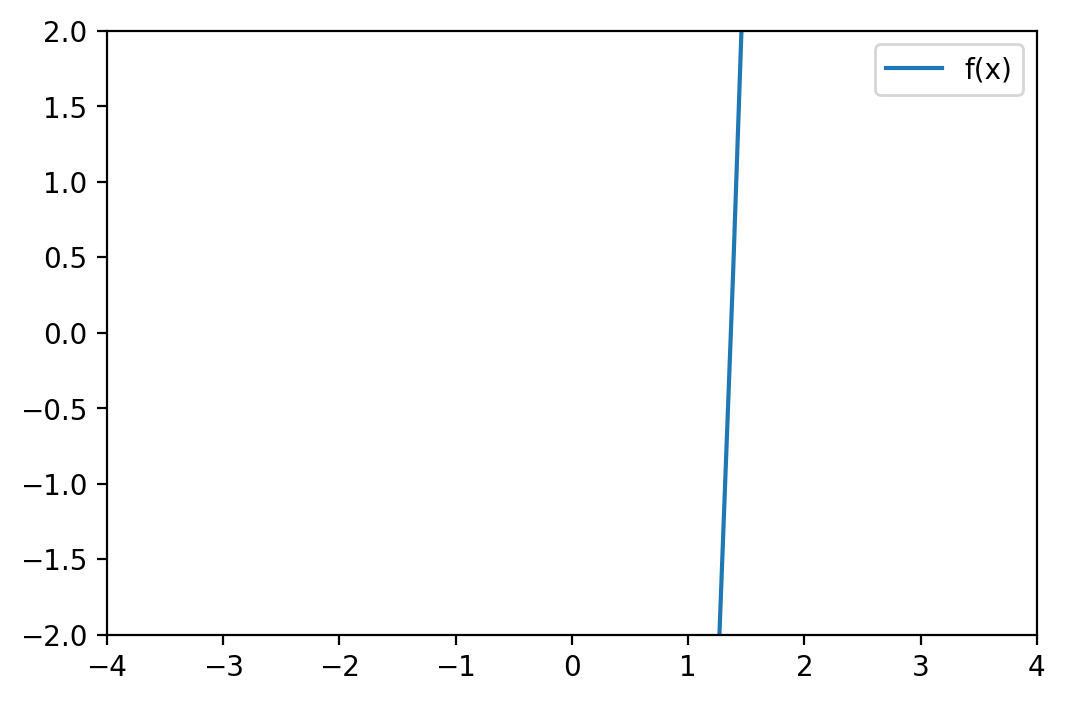

In [2]:
import numpy as np # sirve para hacer arreglos y operaciones entre arreglos
import matplotlib.pyplot as plt # nos sirve para grafica
import scipy.stats as stats #sirve para estadistica
import math # sirve para hacer funciones matematicas, como seno, coseno, potencias, etc.
import pandas as pd
import tabulate as tb

# Ejemplo 2.1
x = np.linspace(-4,4,50) # rango de valores que tomara x
        # linspace me genera un arreglo cuyo elementos van desde el -4 hasta el 4 con 50 intervalos
arreglo1 = [] 
y = np.zeros(len(x))
a = np.zeros(len(x))  # x**3  
b = np.zeros(len(x)) # 2x**2
c = np.zeros(len(x)) # 10*x
indice = 0

print("Haciendo un ciclo for para x")
for elemento in x: # Estoy construyendo el f(x) original, quebrando cada monomio.
    #print(elemento)
    a[indice] = elemento**3
    b[indice] = 2*(elemento**2)
    c[indice] = 10*(elemento)
    y[indice] = a[indice] + b[indice] + c[indice] -20
    indice = indice +1
    

plt.rcParams['figure.dpi'] = 200 # cambiar tamaño del gráfico
plt.plot(x, y)
x_min = -4
x_max = 4
y_min = -2
y_max = 2
plt.legend(["f(x)"])
plt.axis([x_min, x_max, y_min, y_max])
plt.show()    


n:  0
x[n]:  1.0
n:  1
x[n]:  -3.836734693877551
n:  2
x[n]:  -3.673469387755102
n:  3
x[n]:  -3.510204081632653
n:  4
x[n]:  -3.3469387755102042
n:  5
x[n]:  -3.183673469387755
n:  6
x[n]:  -3.020408163265306
n:  7
x[n]:  -2.857142857142857
n:  8
x[n]:  -2.6938775510204085
n:  9
x[n]:  -2.5306122448979593
n:  10
x[n]:  -2.36734693877551
n:  11
x[n]:  -2.2040816326530615
n:  12
x[n]:  -2.0408163265306123
n:  13
x[n]:  -1.8775510204081636
n:  14
x[n]:  -1.7142857142857144
n:  15
x[n]:  -1.5510204081632657
n:  16
x[n]:  -1.3877551020408165
n:  17
x[n]:  -1.2244897959183674
n:  18
x[n]:  -1.0612244897959187
n:  19
x[n]:  -0.8979591836734695
n:  20
x[n]:  -0.7346938775510208
n:  21
x[n]:  -0.5714285714285716
n:  22
x[n]:  -0.4081632653061229
n:  23
x[n]:  -0.24489795918367374
n:  24
x[n]:  -0.08163265306122458
n:  25
x[n]:  0.08163265306122458
n:  26
x[n]:  0.24489795918367285
n:  27
x[n]:  0.408163265306122
n:  28
x[n]:  0.5714285714285712
n:  29
x[n]:  0.7346938775510203
n:  30
x[n]:  0.

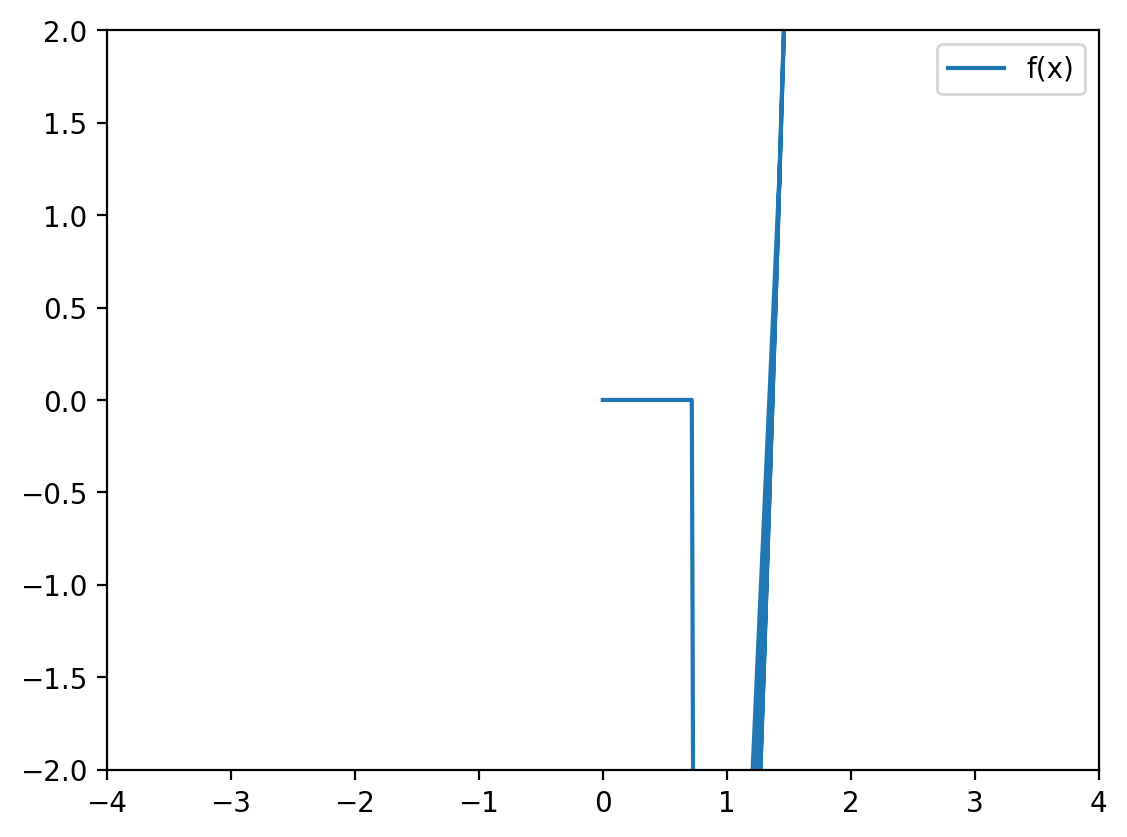

In [23]:
# Para calcular g(x) , i.e. la primera forma alternativa
# g(x) = (20)/(2x^2+2x+10)

# Declarando variables necesarias 
y_2 = np.zeros(len(x)) # haciendo referencia a mi segunda función
a = np.zeros(len(x))  # x**3  
b = np.zeros(len(x)) # 2x**2
c = np.zeros(len(x)) # 10*x
g_x_ = np.zeros(len(x)) # Se decalro un arreglo con tamaño 'x'
x_raiz = np.zeros(len(x))
abs_f_x_i = np.zeros(len(x))
f_x_i = np.zeros(len(x))


# Condiciones inciales para determinar la raíz buscada
# Necesitamos definir la cantidad de iteraciones
# Neestimas definir el valor incial (del tanto)
iteraciones = 40
i = np.arange(0,iteraciones+1)
    # la función de 'arange' me crea un arreglo que va desde 0 hasta iteraciones +1

n = 0 
    
x[0] = 1


for elemento in i:
    #print("elemento: ", elemento)
    print ("n: ", n)
    print("x[n]: ", x[n])
    
    g_x_[n] = (20)/(2*(x[n]**2) + 2*x[n] + 10) # g(X) es la línea de código primordial que vamos a variar.
    x_raiz[n+1] = g_x_[n]
    f_x_i[n] = (x_raiz[n]**3)+ (2*(x_raiz[n]**2))+(10*x_raiz[n])-20 # esta es la funcion orginal con el 
                                                                    # con el nuevo valor de 'x' encontrado.
    abs_f_x_i[n] = abs(f_x_i[n])                                                                
    n = n + 1
    
# Tabulando esta información
data = {"$x_{i}$": x_raiz, "$g(x_{i})$":g_x_,"$\mid f(x_{i}) \mid$":abs_f_x_i}
df = pd.DataFrame(data)
md = df.to_markdown()
print(md)

# Respuesta = 1.3688    
    
# Graficando f(x) y primer forma alternativa g(x)

plt.rcParams['figure.dpi'] = 200 # cambiar tamaño del gráfico
plt.plot(x_raiz,f_x_i )
x_min = -4
x_max = 4
y_min = -2
y_max = 2
plt.legend(["f(x)"])
plt.axis([x_min, x_max, y_min, y_max])
plt.show() 


## Conclusión:

### La primera forma alternativa **NO CONVERGE**

# Intentemos la segunda alternativa


$$
x=x^{3}+ 2x^{2} + 11 x - 20 = g(x)
$$


Haciendo un ciclo for para x


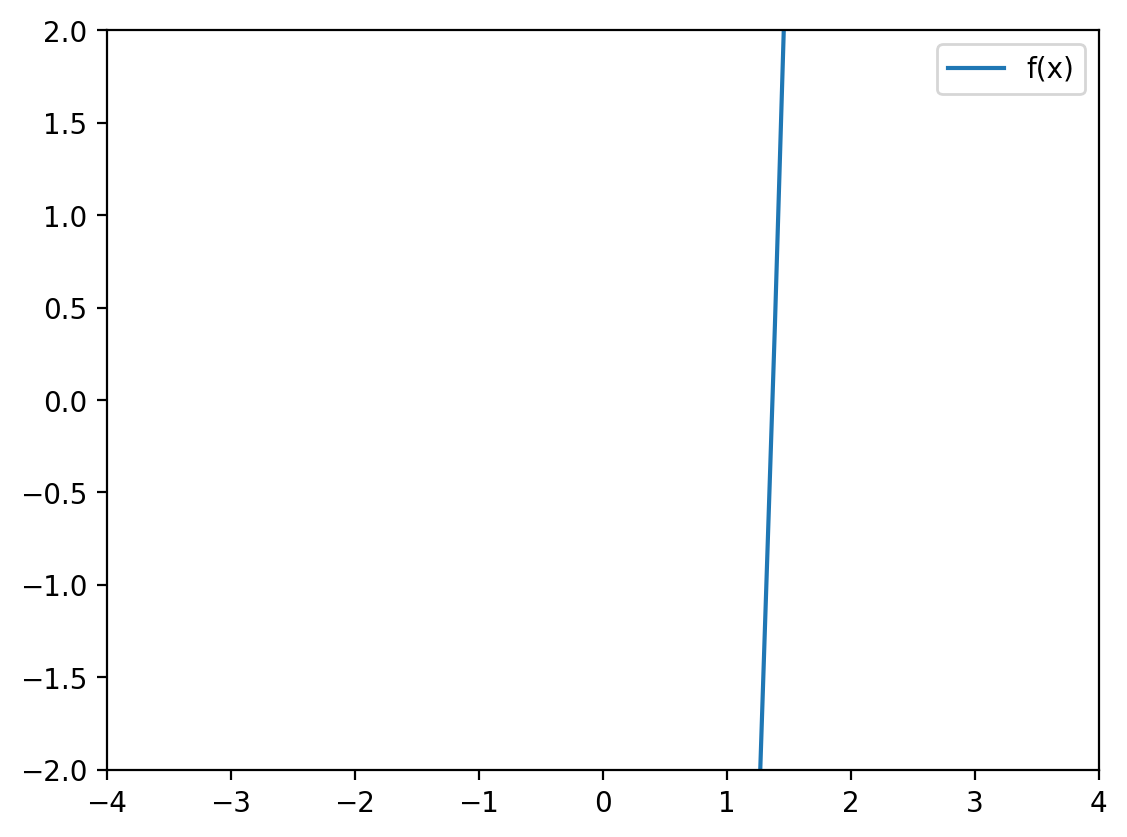

In [25]:
import numpy as np # sirve para hacer arreglos y operaciones entre arreglos
import matplotlib.pyplot as plt # nos sirve para grafica
import scipy.stats as stats #sirve para estadistica
import math # sirve para hacer funciones matematicas, como seno, coseno, potencias, etc.
import pandas as pd
import tabulate as tb

# Ejemplo 2.1
x = np.linspace(-4,4,50) # rango de valores que tomara x
        # linspace me genera un arreglo cuyo elementos van desde el -4 hasta el 4 con 50 intervalos
arreglo1 = [] 
y = np.zeros(len(x))
a = np.zeros(len(x))  # x**3  
b = np.zeros(len(x)) # 2x**2
c = np.zeros(len(x)) # 10*x
indice = 0

print("Haciendo un ciclo for para x")
for elemento in x: # Estoy construyendo el f(x) original, quebrando cada monomio.
    #print(elemento)
    a[indice] = elemento**3
    b[indice] = 2*(elemento**2)
    c[indice] = 10*(elemento)
    y[indice] = a[indice] + b[indice] + c[indice] -20
    indice = indice +1
    

plt.rcParams['figure.dpi'] = 200 # cambiar tamaño del gráfico
plt.plot(x, y)
x_min = -4
x_max = 4
y_min = -2
y_max = 2
plt.legend(["f(x)"])
plt.axis([x_min, x_max, y_min, y_max])
plt.show()    


n:  0
x_raiz[n]:  1.0
n:  1
x_raiz[n]:  -6.0
n:  2
x_raiz[n]:  -230.0
n:  3
x_raiz[n]:  -12063750.0
n:  4
x_raiz[n]:  -1.755686274265989e+21
n:  5
x_raiz[n]:  -5.4117875806810426e+63
n:  6
x_raiz[n]:  -1.584974301381719e+191
n:  7
x_raiz[n]:  nan
n:  8
x_raiz[n]:  nan
n:  9
x_raiz[n]:  nan
n:  10
x_raiz[n]:  nan
|    |         $x_{i}$ |      $g(x_{i})$ |   $\mid f(x_{i}) \mid$ |
|---:|----------------:|----------------:|-----------------------:|
|  0 |    1            |   -6            |           7            |
|  1 |   -6            | -230            |         224            |
|  2 | -230            |   -1.20638e+07  |           1.20635e+07  |
|  3 |   -1.20638e+07  |   -1.75569e+21  |           1.75569e+21  |
|  4 |   -1.75569e+21  |   -5.41179e+63  |           5.41179e+63  |
|  5 |   -5.41179e+63  |   -1.58497e+191 |           1.58497e+191 |
|  6 |   -1.58497e+191 |  nan            |         nan            |
|  7 |  nan            |  nan            |         nan            |
|  8 |

C:\Users\Fernando\AppData\Local\Temp\ipykernel_19240\4058966968.py:29: RuntimeWarning: overflow encountered in double_scalars
  g_x_[n] = (x_raiz[n]**3)+ (2*(x_raiz[n]**2)) + (11*x_raiz[n])-20 # segunda forma de g(x)
C:\Users\Fernando\AppData\Local\Temp\ipykernel_19240\4058966968.py:29: RuntimeWarning: invalid value encountered in double_scalars
  g_x_[n] = (x_raiz[n]**3)+ (2*(x_raiz[n]**2)) + (11*x_raiz[n])-20 # segunda forma de g(x)
C:\Users\Fernando\AppData\Local\Temp\ipykernel_19240\4058966968.py:31: RuntimeWarning: overflow encountered in double_scalars
  f_x_i[n] = (x_raiz[n]**3)+ (2*(x_raiz[n]**2))+(10*x_raiz[n])-20 # esta es la funcion orginal con el
C:\Users\Fernando\AppData\Local\Temp\ipykernel_19240\4058966968.py:31: RuntimeWarning: invalid value encountered in double_scalars
  f_x_i[n] = (x_raiz[n]**3)+ (2*(x_raiz[n]**2))+(10*x_raiz[n])-20 # esta es la funcion orginal con el


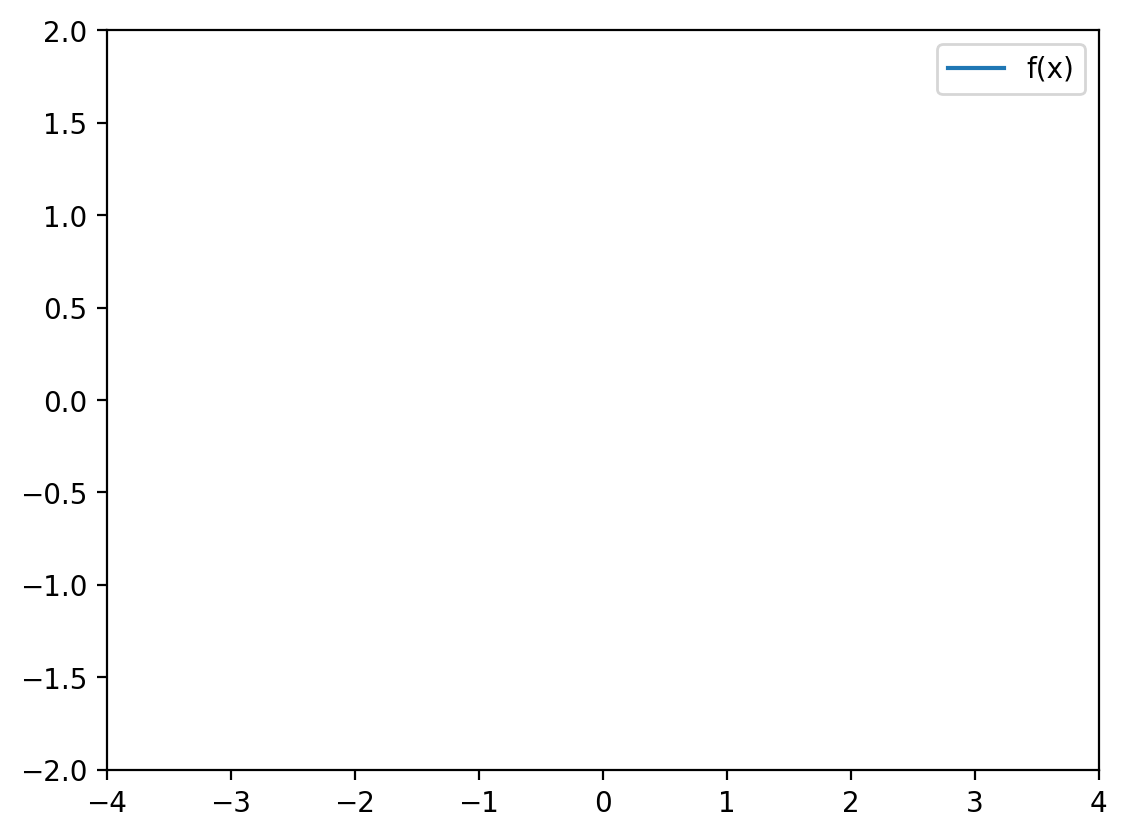

In [36]:
# Para calcular g(x) , i.e. la primera forma alternativa
# g(x) = (20)/(2x^2+2x+10)

# Declarando variables necesarias 
y_2 = np.zeros(len(x)) # haciendo referencia a mi segunda función
a = np.zeros(len(x))  # x**3  
b = np.zeros(len(x)) # 2x**2
c = np.zeros(len(x)) # 10*x
g_x_ = np.zeros(len(x)) # Se decalro un arreglo con tamaño 'x'
x_raiz = np.zeros(len(x))
abs_f_x_i = np.zeros(len(x))
f_x_i = np.zeros(len(x))


# Condiciones inciales para determinar la raíz buscada
# Necesitamos definir la cantidad de iteraciones
# Neestimas definir el valor incial (del tanto)
iteraciones = 10
i = np.arange(0,iteraciones+1)
    # la función de 'arange' me crea un arreglo que va desde 0 hasta iteraciones +1
n = 0 
x_raiz[0] = 1


for elemento in i:
    #print("elemento: ", elemento)
    print ("n: ", n)
    print("x_raiz[n]: ", x_raiz[n])
    g_x_[n] = (x_raiz[n]**3)+ (2*(x_raiz[n]**2)) + (11*x_raiz[n])-20 # segunda forma de g(x)
    x_raiz[n+1] = g_x_[n]
    f_x_i[n] = (x_raiz[n]**3)+ (2*(x_raiz[n]**2))+(10*x_raiz[n])-20 # esta es la funcion orginal con el 
                                                                    # con el nuevo valor de 'x' encontrado.
    abs_f_x_i[n] = abs(f_x_i[n])                                                                
    n = n + 1
    
# Tabulando esta información
data = {"$x_{i}$": x_raiz, "$g(x_{i})$":g_x_,"$\mid f(x_{i}) \mid$":abs_f_x_i}
df = pd.DataFrame(data)
md = df.to_markdown()
print(md)

# Respuesta = 1.3688    
    
# Graficando f(x) y primer forma alternativa g(x)

plt.rcParams['figure.dpi'] = 200 # cambiar tamaño del gráfico
plt.plot(x_raiz,f_x_i )
x_min = -4
x_max = 4
y_min = -2
y_max = 2
plt.legend(["f(x)"])
plt.axis([x_min, x_max, y_min, y_max])
plt.show() 


## La segunda forma alternativa **NO CONVERGE**


## El método de punto fijo NO puede hallar una raíz real.




# Otro Ejemplo
![H9nJl14.png](https://iili.io/H9nJl14.png)


![Ejemplo 3](https://freeimage.host/i/H9nJl14)

<img src="https://iili.io/H9nJl14.png" alt="Ejemplo 3 Punto Fijo" border="0">

___

## Notas del autor

(02/11/2022)

Para enumerar las ecuaciones en juypter notebook con latex intenté ejecutar las siguientes celdas, marcadno las referencias de acuerdo a Latex, pero Jupyter no soporta del todo eso, aasí  que investigue como hacerlo y encontre esta entrada de [Stak Overflow](https://stackoverflow.com/questions/41241984/equation-numbering-in-jupyter-notebooks) que me ayudó a enumerar las ecuacioens con un código de javascript.

Sin embargo al final temrine instalando la extensión.


Para hcer referencias cruzadas consulta el siguiente [enlace](https://jupyterbook.org/en/stable/content/references.html)

En referencia a la celda principal llamada [Another Cell](#another_cell) hemos usado un IDENTIFICADOR en formato HTML. que será invisible cuando ejectuemos la celda. Para nuestro caso se encuentra en la primera linea de la celda.

Como enumerar ecuaciones en LATEX


$ 
\begin{equation}
\ddot{\underline{\mathbf{r}}} = \frac{\dd{}{^2}\underline{\mathbf{r}}}{\dd{t}^2} = 0
\end{equation}
$

____
ALGO MÁS



$
\begin{equation} \label{eq1}
\begin{split}
A & = \frac{\pi r^2}{2} \\
 & = \frac{1}{2} \pi r^2
\end{split}
\end{equation}
$



ALOG MÁS 



$ \begin{equation} \label{eu_eqn}
e^{\pi i} + 1 = 0
\end{equation}
$

The beautiful equation $\ref{eu_eqn}$ is known as the Euler equation.


VOY HACER OTRO INTENTO

$
\begin{equation}
y = mx+b
\end{equation}
$



$
\begin{align}
    r  = \frac{1}{n-1} \sum_{i=1}^{n} \frac{(X_i - \bar{X})(Y_i - \bar{Y})}{S_xS_y}
\end{align}
$



SIN EMBARGO PARA HACERLO EN MARKDWON NO FUNCIONA ESTA ENUMERACIÓN



otro ejemplo de la pregunta de StackOverflow
$
\begin{equation*}
\mathbf{r} \equiv \begin{bmatrix}
y \\
\theta
\end{bmatrix}
\label{eq:vector_ray} \tag{1}
\end{equation*}
$
Vector **r** is defined by equation $\eqref{eq:vector_ray}$

donde claramente podemos ver que **si se puede hacer la referencia cruzada**


The asterisk symbol (*) has no special meaning in LaTeX. It is commonly used to indicate that a command or environment does not produce numbering, e.g. \section* or \begin{align*}. 



The align environment provided by AMS-LaTeX is used for two or more equations when vertical alignment is desired; usually equal signs are aligned. Use ampersands (&) for alignment and a double backslash (\\) to insert a linebreak. 



%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

PARA LOGRAGRLO DEBEMOS INSTALAR UNA EXTENSIÓN

\begin{align}
    g &= \int_a^b f(x)dx \label{eq1} \\
    a &= b + c \label{eq2}
\end{align}


Ver esta [entrada](https://jupyterbook.org/en/stable/content/math.html)


Ahora si quiero hacer referencia a esta última ecuación debería poder hacer esto así: $\eqref{eq1}$



HAcer listas de LATEX



Lists are easy to create:
\begin{itemize}
  \item List entries start with the \verb|\item| command.
  \item Individual entries are indicated with a black dot, a so-called bullet.
  \item The text in the entries may be of any length.
\end{itemize}

$
\begin{itemize}
  \item List entries start with the \verb|\item| command.
  \item Individual entries are indicated with a black dot, a so-called bullet.
  \item The text in the entries may be of any length.
\end{itemize}
$


Sobre el [\begin{align}](https://latex-programming.fandom.com/wiki/Align_(LaTeX_environment))

Sobre el [\begin{gather}](https://www.overleaf.com/learn/latex/Aligning_equations_with_amsmath)

$
\begin{tabbing}
If \= it's raining \\
\> then \= put on boots,\\
\> \> take hat;\\
\> or \> smile. \\
Leave house.
\end{tabbing}
$ 

Otra lternativa para generar tablas en MD se halla en esta [herramienta](https://www.tablesgenerator.com/markdown_tables#)

PAra alinear los graífocs ejecutar la siguiente línea de código

In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Bibliografía

- (Grossman, S. I., & Flores Godoy, J. J. (2012). Algebra Lineal (7th ed.).)
